In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pokemon = pd.read_csv('https://raw.githubusercontent.com/we-b/datasets_for_ai/master/pokemonn.csv')


In [23]:
pokemon.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,318,45,49,49,65,65,45,False
1,Ivysaur,405,60,62,63,80,80,60,False
2,Venusaur,525,80,82,83,100,100,80,False
3,Charmander,309,39,52,43,60,50,65,False
4,Charmeleon,405,58,64,58,80,65,80,False


In [24]:
pokemon.shape


(212, 9)

In [25]:
X0 = pokemon['HP']
X1 = pokemon['Attack']
X2 = pokemon['Defense']
X3 = pokemon['Sp. Atk']
X4 = pokemon['Sp. Def']
X5 = pokemon['Speed']

In [26]:
W0=((X0-X0.mean())/X0.std(ddof=0)*10+50)
W1=((X1-X1.mean())/X1.std(ddof=0)*10+50)
W2=((X2-X2.mean())/X2.std(ddof=0)*10+50)
W3=((X3-X3.mean())/X3.std(ddof=0)*10+50)
W4=((X4-X4.mean())/X4.std(ddof=0)*10+50)
W5=((X5-X5.mean())/X5.std(ddof=0)*10+50)

In [27]:
X_new=np.vstack([X0,X1,X2,X3,X4,X5,W0,W1,W2,W3,W4,W5])
X_new

array([[ 45.        ,  60.        ,  80.        , ...,  80.        ,
         80.        ,  80.        ],
       [ 49.        ,  62.        ,  82.        , ..., 110.        ,
        160.        , 110.        ],
       [ 49.        ,  63.        ,  83.        , ...,  60.        ,
         60.        , 120.        ],
       ...,
       [ 45.33479839,  49.23780842,  54.44182179, ...,  67.45185521,
         72.65586858,  62.24784184],
       [ 45.98406903,  50.74036716,  57.082098  , ...,  66.59469427,
         66.59469427,  53.91123258],
       [ 38.77076368,  43.8895956 ,  50.71470483, ...,  47.30215022,
         50.71470483,  47.30215022]])

In [28]:
X_new.shape

(12, 212)

In [29]:
X_new=X_new.T
X_new

array([[ 45.        ,  49.        ,  49.        , ...,  45.33479839,
         45.98406903,  38.77076368],
       [ 60.        ,  62.        ,  63.        , ...,  49.23780842,
         50.74036716,  43.8895956 ],
       [ 80.        ,  82.        ,  83.        , ...,  54.44182179,
         57.082098  ,  50.71470483],
       ...,
       [ 80.        , 110.        ,  60.        , ...,  67.45185521,
         66.59469427,  47.30215022],
       [ 80.        , 160.        ,  60.        , ...,  72.65586858,
         66.59469427,  50.71470483],
       [ 80.        , 110.        , 120.        , ...,  62.24784184,
         53.91123258,  47.30215022]])

In [30]:
X_new.shape

(212, 12)

In [31]:
A1 = X1*X3
A2=X3*X4
A3=X3*X5
A4=X1*X5

In [32]:
X_new=np.vstack([X0,X1,X2,X3,X4,X5,W0,W1,W2,W3,W4,W5,A1,A2,A3,A4])
X_new=X_new.T
X_new

array([[   45.,    49.,    49., ...,  4225.,  2925.,  2205.],
       [   60.,    62.,    63., ...,  6400.,  4800.,  3720.],
       [   80.,    82.,    83., ..., 10000.,  8000.,  6560.],
       ...,
       [   80.,   110.,    60., ..., 19500., 10500.,  7700.],
       [   80.,   160.,    60., ..., 22100., 13600., 12800.],
       [   80.,   110.,   120., ..., 11700.,  9100.,  7700.]])

In [33]:
X_new.shape

(212, 16)

In [38]:
def zscore(x):
    xmean=x.mean()
    xstd=np.std(x)
    
    zscore=(x-xmean)/xstd
    return zscore

In [39]:
X0 = zscore(X0)
X1 = zscore(X1)
X2 = zscore(X2)
X3 = zscore(X3)
X4 = zscore(X4)
X5 = zscore(X5)
W0 = zscore(W0)
W1 = zscore(W1)
W2 = zscore(W2)
W3 = zscore(W3)
W4 = zscore(W4)
W5 = zscore(W5)
A1 = zscore(A1)
A2 = zscore(A2)
A3 = zscore(A3)
A4 = zscore(A4)

In [40]:
X_new = np.vstack([X0, X1, X2, X3, X4, X5, W0, W1, W2, W3, W4, W5, A1, A2, A3, A4])
X_new = X_new.T
X_new


array([[-0.92056892, -1.06099165, -0.91690156, ..., -0.55987473,
        -0.80997902, -1.04482964],
       [-0.41653842, -0.68446667, -0.4653728 , ..., -0.13849027,
        -0.44570771, -0.72239405],
       [ 0.25550226, -0.10519747,  0.17966828, ...,  0.55897366,
         0.17598199, -0.11796035],
       ...,
       [ 0.25550226,  0.70577941, -0.56212897, ...,  2.39950348,
         0.66167707,  0.12466445],
       [ 0.25550226,  2.15395241, -0.56212897, ...,  2.90322744,
         1.26393897,  1.21009118],
       [ 0.25550226,  0.70577941,  1.37299429, ...,  0.88833163,
         0.38968783,  0.12466445]])

In [41]:
X_new.shape

(212, 16)

In [42]:
from sklearn.feature_selection import SelectPercentile
# train_test_splitモジュールのインポート
from sklearn.model_selection import train_test_split


In [43]:
pokemon.target =pokemon['Legendary']
pokemon.target

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0      False
1      False
2      False
3      False
4      False
       ...  
207     True
208     True
209     True
210     True
211     True
Name: Legendary, Length: 212, dtype: bool

In [44]:
X_train,X_test,y_train,y_test=train_test_split(
    X_new,pokemon.target,test_size=.3)

In [45]:
select=SelectPercentile(percentile=50)

In [46]:
select.fit(X_train,y_train)

SelectPercentile(percentile=50,
                 score_func=<function f_classif at 0x7f5cd6a8abf8>)

In [47]:
X_train_selected = select.transform(X_train)

In [48]:
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (148, 16)
X_train_selected.shape: (148, 8)


[False  True False  True False False False  True False  True False False
  True  True  True  True]


([], <a list of 0 Text yticklabel objects>)

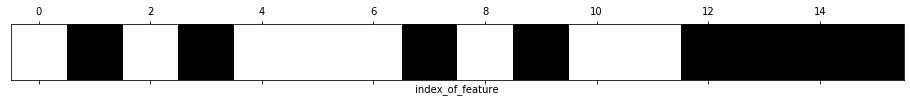

In [49]:
mask=select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("index_of_feature")
plt.yticks(())

In [50]:
mask.reshape(1,-1)

array([[False,  True, False,  True, False, False, False,  True, False,
         True, False, False,  True,  True,  True,  True]])

In [53]:
#特徴量を減らしたことで正答率が変わるか比較
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr=LogisticRegression()
lr.fit(X_train,y_train)
print("score with all features: {:.3f}".format(lr.score(X_test,y_test)))

score with all features: 0.984


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
y_p = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_p)

array([[42,  1],
       [ 0, 21]])

In [55]:
lr.fit(X_train_selected,y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected,y_test)))

Score with only selected features: 0.938


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
y_p = lr.predict(X_test_selected)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_p)

array([[42,  1],
       [ 3, 18]])